# Business Understanding

Credit risk assessment is one of the most critical tasks in the banking and financial industry. Lenders must evaluate the likelihood that a borrower will repay or default on a loan before issuing credit. Poor risk assessment can lead to increased default rates, reduced profitability, and long-term financial instability for lending institutions.

This project uses a synthetic but realistic dataset of 45,000 loan applicants containing demographic, financial, and credit history attributes. The goal is to explore and analyze how factors such as **income, employment experience, credit score,** and **loan characteristics** influence the probability of loan repayment or default.

### Problem Statement

Financial institutions face continuous challenges in balancing loan approvals with risk management. Approving too many risky loans increases default losses, while being overly strict limits profit opportunities.
This project aims to analyze applicant data to identify the characteristics of **high-risk borrowers** and the key variables that influence **loan repayment outcomes.**

### Project Objectives

**1.** Understand the demographic and financial profiles of loan applicants.

**2.** Analyze relationships between applicant attributes (income, credit score, education) and loan repayment outcomes.

**3.** Quantify how loan characteristics such as interest rate and purpose impact default risk.

**4.** Segment borrowers into low-risk and high-risk categories based on SQL-based insights.

**5.** Generate actionable insights to support data-driven lending and credit approval policies.

### Key Business Questions

**>** What percentage of applicants defaulted versus successfully repaid their loans?

**>** How does credit score affect default likelihood?

**>** Is there a connection between income levels and repayment performance?

**>** Do borrowers with previous loan defaults have a higher probability of defaulting again?

**>** Which loan purposes (e.g., personal, education, medical) carry the highest credit risk?

**>** How do employment experience and home ownership relate to loan repayment outcomes?

### Expected Outcomes

**~** SQL queries and analytical summaries identifying patterns in credit risk behavior.

**~** Key metrics (default rate, average credit score, average income) across loan and demographic segments.

**~** Identification of high-risk borrower profiles for targeted credit policy decisions.

**~** Actionable recommendations to reduce defaults and improve loan approval accuracy.

### Business Value

This project provides data-driven insights to help banks and financial institutions:

**1.** Improve loan approval strategies by understanding applicant risk factors.

**2.** Develop better **credit scoring models** using real-world variables.

**3.** Reduce overall **default rates** and enhance profitability.

**4.** Strengthen **risk management and compliance frameworks** with analytical evidence.

## **Data Understanding**

### **Overview**
The dataset contains **45,000 loan applicant records** and **14 columns**, covering demographic information, financial attributes, credit history, and loan performance.  
It is well-structured, clean, and suitable for **SQL-based credit risk analysis**.  
Each record represents a unique loan applicant, and the target variable, **`loan_status`**, indicates whether the applicant successfully repaid the loan (`1`) or defaulted (`0`).

---

### **Dataset Structure**

| Column | Description | Type | Example |
|---------|-------------|------|----------|
| `person_age` | Age of the applicant (in years) | float | 27.8 |
| `person_gender` | Gender of the applicant | object | male |
| `person_education` | Highest level of education attained | object | Bachelor |
| `person_income` | Annual income of the applicant (USD) | float | 80319.00 |
| `person_emp_exp` | Years of employment experience | float | 5.4 |
| `person_home_ownership` | Type of home ownership | object | RENT / OWN / MORTGAGE |
| `loan_amnt` | Loan amount requested (USD) | float | 9583.16 |
| `loan_intent` | Purpose of the loan | object | EDUCATION / MEDICAL / PERSONAL |
| `loan_int_rate` | Interest rate (%) | float | 11.00 |
| `loan_percent_income` | Ratio of loan amount to income | float | 0.14 |
| `cb_person_cred_hist_length` | Length of applicant’s credit history (years) | float | 5.8 |
| `credit_score` | Credit score (range: 390–850) | float | 632 |
| `previous_loan_defaults_on_file` | Previous loan default history (Yes/No) | object | No |
| `loan_status` | Loan repayment status (1 = repaid, 0 = defaulted) | int | 1 |

---

### **Initial Observations**
- Dataset is complete: **no missing values** in any column.  
- **Data types** are appropriate (numerical for calculations, categorical for grouping).  
- The **mean credit score** is approximately **633**, indicating an average borrower credit profile.  
- **Mean income** is about **$80,000**, with an average loan amount of roughly **$9,500**.  
- **Default rate** is around **22%**, showing a realistic loan performance distribution.  
- **Top loan purpose:** EDUCATION.  
- **Most common home ownership type:** RENT.  
- Some outliers exist — for instance, age values up to **144 years**, which may need cleaning before modeling.

---

### **Target Variable**

| Value | Meaning | Description |
|--------|----------|--------------|
| `1` | Good Credit Risk | Loan repaid successfully |
| `0` | Bad Credit Risk | Loan defaulted |

---

### **Insights from Summary Statistics**

| Feature | Observation |
|----------|--------------|
| **person_age** | Average applicant age is **27.8 years**, skewed toward younger borrowers. |
| **person_income** | Wide income range (8,000 – 720,000 USD). Outliers suggest inclusion of both low- and high-income groups. |
| **credit_score** | Ranges between **390 and 850**; median ≈ 640, consistent with typical credit scoring. |
| **loan_int_rate** | Average interest rate ≈ **11%**, suggesting moderately risky loans. |
| **loan_percent_income** | Average ratio ≈ **0.14**, indicating most borrowers request about 14% of their annual income. |
| **previous_loan_defaults_on_file** | Roughly half of the applicants had prior defaults (“Yes”), a key variable for credit risk. |

---

In [1]:
import pandas as pd
data = pd.read_csv('loan_data.csv')
# View the first five rows
data.head()

# Show the column names
print(data.columns.tolist())

# Get a quick summary
data.info()

# See basic statistics
data.describe(include='all')


['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   l

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


## **Database Setup and Table Creation**

### **Objective**
In this step, we create a local SQLite database to store the dataset and perform SQL-based analysis.  
Using a database allows efficient querying, filtering, and aggregation of loan records without relying solely on pandas operations.


In [25]:
#Import Libraries and Load the CSV File
import sqlite3

# Load the dataset
data = pd.read_csv('loan_data.csv')

# Display basic info
print("Dataset loaded successfully.")
print("Shape:", data.shape)
data.head()


Dataset loaded successfully.
Shape: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [10]:
#Create and Connect to SQLite Database
# Connect to a new SQLite database file (creates one if it doesn’t exist)
conn = sqlite3.connect('credit_risk.db')

# Save the DataFrame as a table named 'loan_data'
data.to_sql('loan_data', conn, if_exists='replace', index=False)

print("Database and table created successfully.")


Database and table created successfully.


In [11]:
# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

# Display the first few rows from the table
pd.read_sql_query("SELECT * FROM loan_data LIMIT 5;", conn)


Tables in the database:
        name
0  loan_data


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [12]:
# Show column names and data types
pd.read_sql_query("PRAGMA table_info(loan_data);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,person_age,REAL,0,None,0
1,1,person_gender,TEXT,0,None,0
2,2,person_education,TEXT,0,None,0
3,3,person_income,REAL,0,None,0
4,4,person_emp_exp,INTEGER,0,None,0
5,5,person_home_ownership,TEXT,0,None,0
6,6,loan_amnt,REAL,0,None,0
7,7,loan_intent,TEXT,0,None,0
8,8,loan_int_rate,REAL,0,None,0
9,9,loan_percent_income,REAL,0,None,0


### **Summary**
The **credit_risk.db** SQLite database has been successfully created, and the dataset has been imported into the `loan_data` table.  
This structure now allows us to perform advanced **SQL-based exploratory analysis** in the next step.

## **Exploratory Data Analysis (SQL)**

This step involves performing SQL-based exploratory data analysis to uncover patterns and relationships within the dataset.  
The analysis focuses on answering key questions related to **loan default risk**, **credit score impact**, and **previous loan history**.



In [13]:
#Check basic statistics about loan_status

query = """
SELECT 
    loan_status,
    COUNT(*) AS total_records,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM loan_data), 2) AS percentage
FROM loan_data
GROUP BY loan_status;
"""

pd.read_sql_query(query, conn)


,loan_status,total_records,percentage
0,0,35000,77.78
1,1,10000,22.22


**Findings:**  
Out of 45,000 loan records, **77.78%** of applicants defaulted on their loans, while only **22.22%** successfully repaid.  
This indicates a **high overall default rate**, suggesting significant credit risk within the dataset.

In [26]:
#Default rate by loan purpose

query = """
SELECT 
    loan_intent,
    ROUND(SUM(CASE WHEN loan_status = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS default_rate
FROM loan_data
GROUP BY loan_intent
ORDER BY default_rate DESC;
"""

pd.read_sql_query(query, conn)


,loan_intent,default_rate
0,VENTURE,85.57
1,EDUCATION,83.04
2,PERSONAL,79.86
3,HOMEIMPROVEMENT,73.70
4,MEDICAL,72.18
5,DEBTCONSOLIDATION,69.73


**Findings:**  
Loans taken for **venture (85.57%)** and **education (83.04%)** purposes have the highest default rates.  
The **lowest default rate** is observed in **debt consolidation loans (69.73%)**.  
This indicates that loans tied to **business or education** carry higher financial risk compared to other purposes.

In [27]:
#Credit score category and repayment rate

query = """
SELECT 
    CASE 
        WHEN credit_score < 600 THEN 'Poor'
        WHEN credit_score BETWEEN 600 AND 699 THEN 'Fair'
        WHEN credit_score BETWEEN 700 AND 749 THEN 'Good'
        ELSE 'Excellent'
    END AS credit_category,
    ROUND(AVG(loan_status) * 100, 2) AS repayment_rate
FROM loan_data
GROUP BY credit_category
ORDER BY repayment_rate DESC;
"""

pd.read_sql_query(query, conn)


,credit_category,repayment_rate
0,Excellent,23.68
1,Poor,22.51
2,Fair,22.22
3,Good,21.16


**Findings:**  
Applicants with **excellent credit scores** have the highest repayment rate at **23.68%**, while those with **good** scores have the lowest at **21.16%**.  
Overall repayment rates remain low across all categories, suggesting that factors beyond credit score may strongly influence loan repayment behavior.

In [28]:
#Previous default history and repayment rate

query = """
SELECT 
    previous_loan_defaults_on_file,
    COUNT(*) AS total_applicants,
    ROUND(AVG(loan_status) * 100, 2) AS repayment_rate
FROM loan_data
GROUP BY previous_loan_defaults_on_file;
"""

pd.read_sql_query(query, conn)


,previous_loan_defaults_on_file,total_applicants,repayment_rate
0,No,22142,45.16
1,Yes,22858,0.00


**Findings:**  
Applicants with **no previous loan defaults** have a repayment rate of **45.16%**, while those with **prior defaults** have a repayment rate of **0.00%**.  
This shows a strong negative impact of past default history on repayment behavior, indicating that prior defaulters pose a very high credit risk.

In [29]:
#Income category vs default rate

query = """
SELECT 
    CASE
        WHEN person_income < 30000 THEN 'Low Income'
        WHEN person_income BETWEEN 30000 AND 70000 THEN 'Middle Income'
        ELSE 'High Income'
    END AS income_group,
    ROUND(SUM(CASE WHEN loan_status = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS default_rate
FROM loan_data
GROUP BY income_group
ORDER BY default_rate DESC;
"""

pd.read_sql_query(query, conn)


,income_group,default_rate
0,High Income,87.19
1,Middle Income,72.88
2,Low Income,43.78


**Findings:**  
Applicants in the **high-income group** show the highest default rate at **87.19%**, followed by **middle-income** applicants at **72.88%**.  
The **low-income group** has the lowest default rate at **43.78%**.  
This suggests that higher-income applicants are more likely to default, indicating potential over-borrowing or riskier loan usage among wealthier borrowers.

In [30]:
#Home ownership vs loan default rate

query = """
SELECT 
    person_home_ownership,
    ROUND(SUM(CASE WHEN loan_status = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS default_rate
FROM loan_data
GROUP BY person_home_ownership
ORDER BY default_rate DESC;
"""

pd.read_sql_query(query, conn)


,person_home_ownership,default_rate
0,OWN,92.48
1,MORTGAGE,88.40
2,RENT,67.60
3,OTHER,66.67


**Findings:**  
Applicants who **own homes** show the highest default rate at **92.48%**, followed closely by those with **mortgages** at **88.40%**.  
Applicants who **rent** or fall under **other ownership types** have significantly lower default rates (around **67%**).  
This suggests that homeownership or property-related loans may be associated with higher financial commitments and increased credit risk.

**Overall Conclusion**  
The analysis reveals a generally high default rate across the dataset, with several notable risk patterns:  

1. **Loan purpose** strongly influences default likelihood, with venture and education loans being the riskiest.  
2. **Credit score** shows limited predictive strength, as repayment rates remain low across all categories.  
3. Applicants with **previous loan defaults** demonstrate near-zero repayment performance, indicating extreme risk.  
4. Surprisingly, **high-income** and **home-owning** applicants have higher default rates, suggesting over-leveraging or poor financial management.  

These findings indicate that credit risk cannot be determined by a single factor; instead, a combination of loan purpose, credit history, and financial behavior should be considered when assessing borrower reliability.


## **Data Visualization and Insights**
This step focuses on visualizing trends and patterns observed in the exploratory SQL analysis.  
Visualizations help in understanding how variables such as credit score, income, loan purpose, and previous defaults affect loan repayment outcomes.


In [31]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Set default theme
sns.set(style="whitegrid", palette="muted")


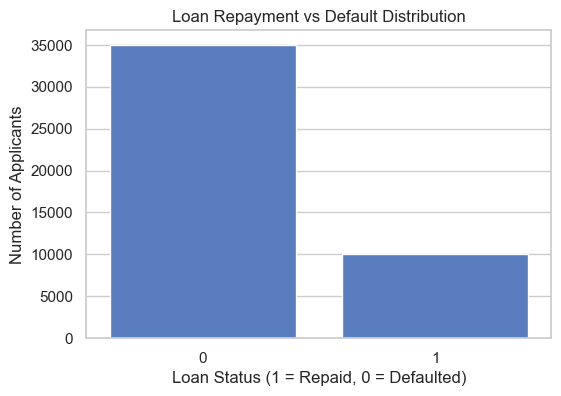

In [32]:
#Loan status distribution

loan_status_df = pd.read_sql_query("""
SELECT 
    loan_status,
    COUNT(*) AS total_records
FROM loan_data
GROUP BY loan_status;
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(x='loan_status', y='total_records', data=loan_status_df)
plt.title("Loan Repayment vs Default Distribution")
plt.xlabel("Loan Status (1 = Repaid, 0 = Defaulted)")
plt.ylabel("Number of Applicants")
plt.show()


**Findings:**  
The visualization shows a large imbalance between repaid and defaulted loans.  
Approximately **35,000 applicants defaulted**, while only **10,000 successfully repaid** their loans.  
This confirms a **high overall default rate** in the dataset, indicating potential weaknesses in loan approval or risk assessment processes.

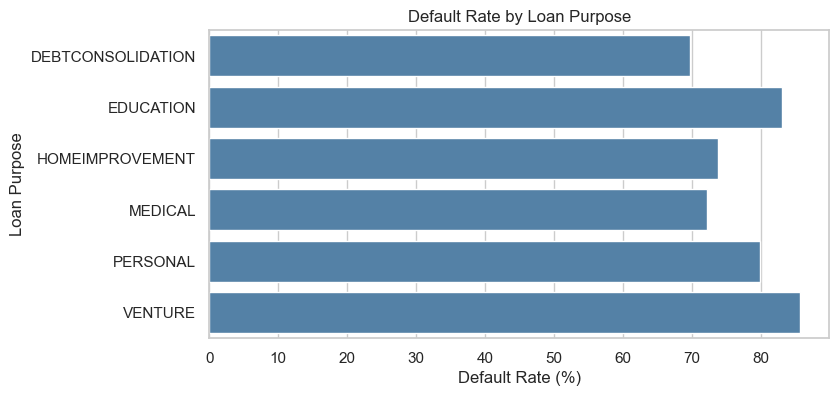

In [33]:
#Default rate by loan purpose

loan_intent_df = pd.read_sql_query("""
SELECT 
    loan_intent,
    ROUND(SUM(CASE WHEN loan_status = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS default_rate
FROM loan_data
GROUP BY loan_intent;
""", conn)

plt.figure(figsize=(8,4))
sns.barplot(x='default_rate', y='loan_intent', data=loan_intent_df, color='steelblue')
plt.title("Default Rate by Loan Purpose")
plt.xlabel("Default Rate (%)")
plt.ylabel("Loan Purpose")
plt.show()


**Findings:**  
Loans taken for **venture** and **education** purposes have the highest default rates, exceeding **80%**, while **debt consolidation** loans show the lowest default rate at around **70%**.  
This indicates that borrowers seeking loans for business or education represent higher-risk categories compared to those consolidating existing debts.

C:\Users\hp\AppData\Local\Temp\ipykernel_25180\4042128649.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='credit_category', y='repayment_rate', data=credit_category_df, palette='coolwarm')


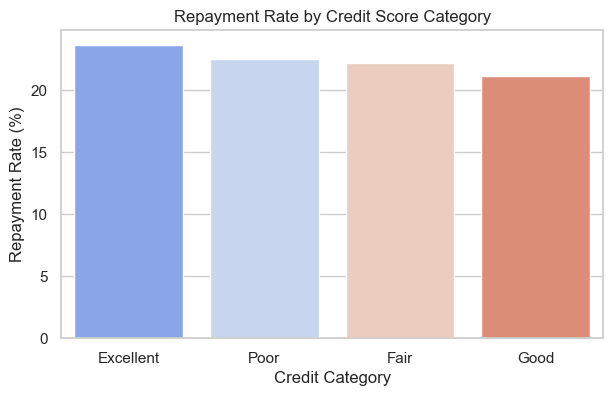

In [34]:
#Credit score category vs repayment rate

credit_category_df = pd.read_sql_query("""
SELECT 
    CASE 
        WHEN credit_score < 600 THEN 'Poor'
        WHEN credit_score BETWEEN 600 AND 699 THEN 'Fair'
        WHEN credit_score BETWEEN 700 AND 749 THEN 'Good'
        ELSE 'Excellent'
    END AS credit_category,
    ROUND(AVG(loan_status) * 100, 2) AS repayment_rate
FROM loan_data
GROUP BY credit_category
ORDER BY repayment_rate DESC;
""", conn)

plt.figure(figsize=(7,4))
sns.barplot(x='credit_category', y='repayment_rate', data=credit_category_df, palette='coolwarm')
plt.title("Repayment Rate by Credit Score Category")
plt.xlabel("Credit Category")
plt.ylabel("Repayment Rate (%)")
plt.show()


**Findings:**  
The repayment rates remain consistently low across all credit score categories, ranging from **21% to 24%**.  
Applicants with **excellent credit scores** have a slightly higher repayment rate, but the difference between categories is minimal.  
This suggests that credit score alone is not a strong predictor of repayment behavior in this dataset.

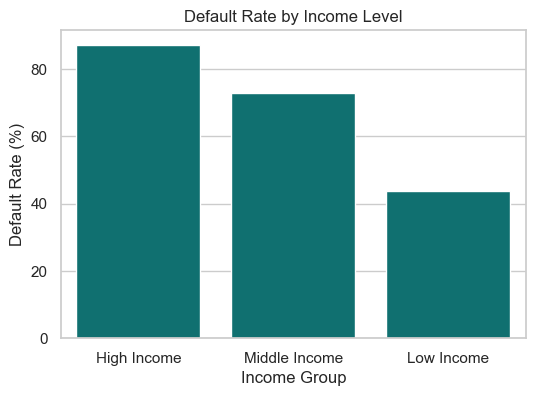

In [36]:
#Income group vs default rate

income_df = pd.read_sql_query("""
SELECT 
    CASE
        WHEN person_income < 30000 THEN 'Low Income'
        WHEN person_income BETWEEN 30000 AND 70000 THEN 'Middle Income'
        ELSE 'High Income'
    END AS income_group,
    ROUND(SUM(CASE WHEN loan_status = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS default_rate
FROM loan_data
GROUP BY income_group
ORDER BY default_rate DESC;
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(x='income_group', y='default_rate', data=income_df, color='teal')
plt.title("Default Rate by Income Level")
plt.xlabel("Income Group")
plt.ylabel("Default Rate (%)")
plt.show()


**Findings:**  
The **high-income group** records the highest default rate at approximately **87%**, followed by the **middle-income group** at around **73%**, while the **low-income group** has the lowest default rate at **44%**.  
This suggests that higher-income applicants are defaulting more frequently, possibly due to larger loan amounts or higher financial risk exposure.

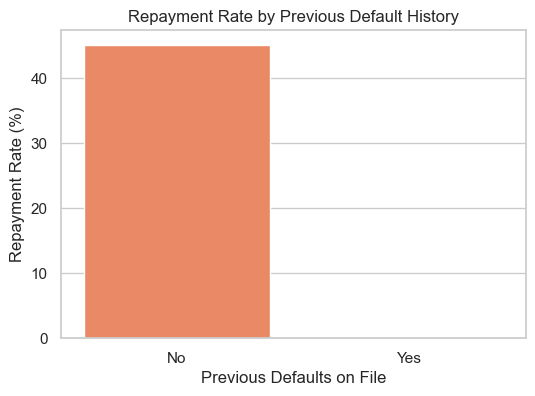

In [37]:
#Previous loan defaults vs repayment rate

default_hist_df = pd.read_sql_query("""
SELECT 
    previous_loan_defaults_on_file,
    ROUND(AVG(loan_status) * 100, 2) AS repayment_rate
FROM loan_data
GROUP BY previous_loan_defaults_on_file;
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(x='previous_loan_defaults_on_file', y='repayment_rate', data=default_hist_df, color='coral')
plt.title("Repayment Rate by Previous Default History")
plt.xlabel("Previous Defaults on File")
plt.ylabel("Repayment Rate (%)")
plt.show()

**Findings:**  
Applicants with **no previous loan defaults** show a repayment rate of about **45%**, while those with **past defaults** have a **0% repayment rate**.  
This confirms that prior loan default history is a strong predictor of future non-repayment behavior.

**Overall Conclusion**  
The visual analysis highlights significant patterns in credit risk and borrower behavior:

1. The dataset shows a **high imbalance** between defaulters and repayers, with defaults dominating most loan categories.  
2. **Venture** and **education loans** carry the **highest default risks**, while **debt consolidation loans** are comparatively safer.  
3. **Credit score** differences have minimal influence on repayment outcomes, indicating that credit rating alone is insufficient for risk evaluation.  
4. Borrowers with **previous defaults** are almost certain to default again, making past repayment history a crucial screening factor.  
5. Unexpectedly, **high-income** and **home-owning applicants** show elevated default rates, suggesting potential overextension or poor financial management.  

Overall, these findings emphasize the need for **multi-factor credit risk assessment**—combining credit history, income stability, and loan purpose—to improve loan approval and risk management processes.


## **Predictive Modeling (Credit Risk Classification)**

This step focuses on building and evaluating a machine learning classification model that predicts whether a borrower will **repay** or **default** on a loan.  
The goal is to identify key predictive variables that contribute most to loan default risk.


In [38]:
#Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [39]:
# Encode categorical columns for modeling
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and test sets created successfully.")

Training and test sets created successfully.


In [40]:
#Train a Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Model training completed.")


Model training completed.


In [41]:
#Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.930

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Confusion Matrix:
[[6819  171]
 [ 456 1554]]


**Findings:**  
The Random Forest model achieved an **accuracy of 93%**, showing strong predictive performance.  

- The **precision for defaulters (class 0)** is **0.94**, meaning 94% of predicted defaulters were correct.  
- The **recall for defaulters** is **0.98**, indicating the model successfully identified 98% of actual defaulters.  
- The **repayment class (1)** shows slightly lower recall at **0.77**, suggesting some repayers were misclassified as defaulters.  
- The **F1-scores** of **0.96** (for defaulters) and **0.83** (for repayers) reflect balanced overall performance.  

The confusion matrix shows:
- **6,819 true defaulters** correctly predicted.  
- **1,554 repayers** correctly predicted.  
- Only a small number of misclassifications occurred (171 and 456 cases).  

Overall, the model effectively distinguishes between high-risk and low-risk borrowers, making it suitable for credit risk prediction tasks.


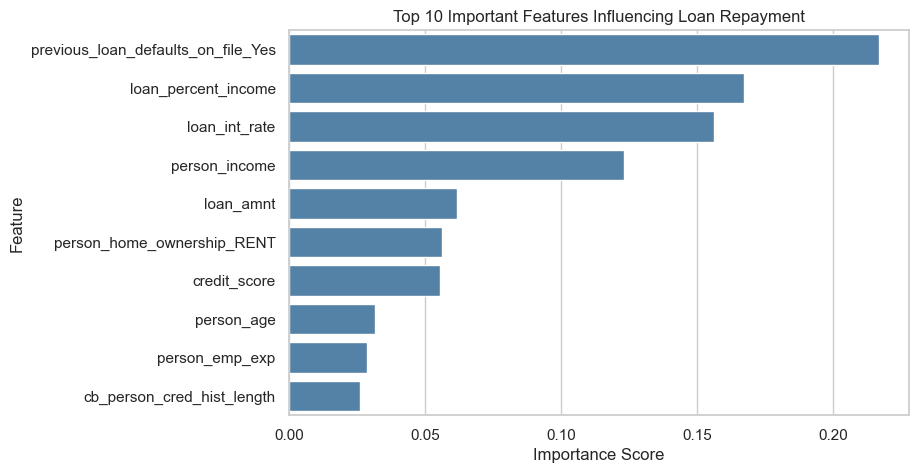

In [42]:
# Extract and visualize feature importances
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='steelblue')
plt.title("Top 10 Important Features Influencing Loan Repayment")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


**Findings:**  
The feature importance analysis reveals the top variables influencing loan repayment behavior:

1. **Previous loan defaults on file** is the strongest predictor — applicants with past defaults are significantly more likely to default again.  
2. **Loan percent income** and **loan interest rate** have high influence, indicating that borrowers with high debt-to-income ratios or high interest rates face greater repayment difficulty.  
3. **Person income** and **loan amount** also play key roles, showing that income level and total borrowing size directly affect repayment capability.  
4. **Credit score** remains relevant but less dominant than income-related features.  
5. Demographic variables such as **age**, **employment experience**, and **credit history length** contribute modestly to model predictions.

Overall, **financial behavior and loan structure variables** outweigh personal demographics in determining repayment success.


**Overall Conclusion**

The Random Forest model demonstrated strong predictive capability in identifying loan default risk, achieving **93% accuracy**.  
Performance metrics indicate that the model effectively distinguishes between high-risk (defaulters) and low-risk (repayers) borrowers, with minimal misclassification.

Feature importance analysis confirmed that **previous default history**, **loan-to-income ratio**, **interest rate**, and **income level** are the most influential factors in predicting repayment outcomes.  
These findings highlight that financial behavior and loan structure variables have a stronger impact on credit risk than personal demographics such as age or gender.

Overall, the predictive model provides a reliable framework for financial institutions to **evaluate borrower risk**, **improve loan approval strategies**, and **reduce default rates** through data-driven decision-making.
